**Введите ваше ФИО**

In [ ]:
print("Зорин Михаил Алексеевич")

Зорин Михаил Алексеевич


# Задание 1

Задача: Создать чат бота для получения информации об исследованиях космоса

Описание: Создайте комплексное приложение командной строки, которое будет использоваться в качестве панели управления исследованиями космоса. Данное приложение будет обращаться к https://api.nasa.gov/ для предоставления пользователям набора информации о космосе, включая:

- Астрономическая картинка дня (APOD): Отображение APOD с пояснениями к нему.
- Фотографии с марсохода: позволяет пользователям выбирать и фильтровать фотографии с марсохода по дате и типу камеры.
- Объекты, сближающиеся с Землей (ОСЗ): Поиск и отображение объектов, сближающихся с Землей, на определенную дату, включая их размеры и потенциальную опасность.
- Данные о космической погоде: Отображают последние данные о космической погоде, включая солнечные вспышки и геомагнитные бури.
Приложение должно позволять пользователям ориентироваться в этих функциях, корректно обрабатывать ошибки и обеспечивать удобство работы.

Требования:
- Пользовательский ввод: Приложение должно предложить пользователю ввести данные, чтобы выбрать, какую функцию он хочет изучить.
- Проверка данных: Убедитесь, что пользовательские данные (например, даты) проверены.
- Обработка ошибок: Корректно обрабатывайте ошибки API и неверные ответы.
- Представление данных: Представляйте данные в четкой и организованной форме.
- Опция выхода: позволяет пользователям выходить из приложения в любое время.

 Выберите действие:
  1 - фото космоса 
  2 - фото марсохода 
  3 - ближайшие астероиды 
  4 - погода 
  5 - выход
1
Введите дату в формате (ГГГГ-ММ-ДД): 2000-10-10
  date - 2000-10-10  
    explanation - Most galaxies have a single nucleus -- does this galaxy have four?  The strange answer leads astronomers to conclude that the nucleus of the surrounding galaxy is not even visible in this image.  The central cloverleaf is rather light emitted from a background quasar.  The gravitational field of the visible foreground galaxy breaks light from this distant quasar into four distinct images.  The quasar must be properly aligned behind the center of a massive galaxy for a mirage like this to be evident.  The general effect is known as gravitational lensing, and this specific case is known as the Einstein Cross.  Stranger still, the images of the Einstein Cross vary in relative brightness, enhanced occasionally by the additional gravitational microlensing effect of specific stars in the fo

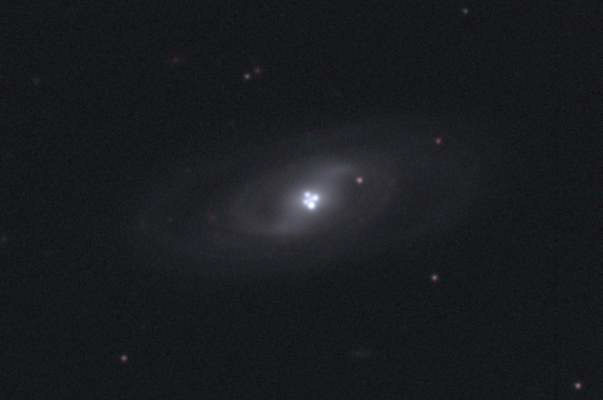

 Выберите действие:
  1 - фото космоса 
  2 - фото марсохода 
  3 - ближайшие астероиды 
  4 - погода 
  5 - выход
2
Введите дату в формате (ГГГГ-ММ-ДД): 2020-05-30
Выберите тип камеры: FHAZ, RHAZ, MAST, CHEMCAN, MAHLI, MARDI, NAVCAM, PANCAM, MINITES 
      rhaz


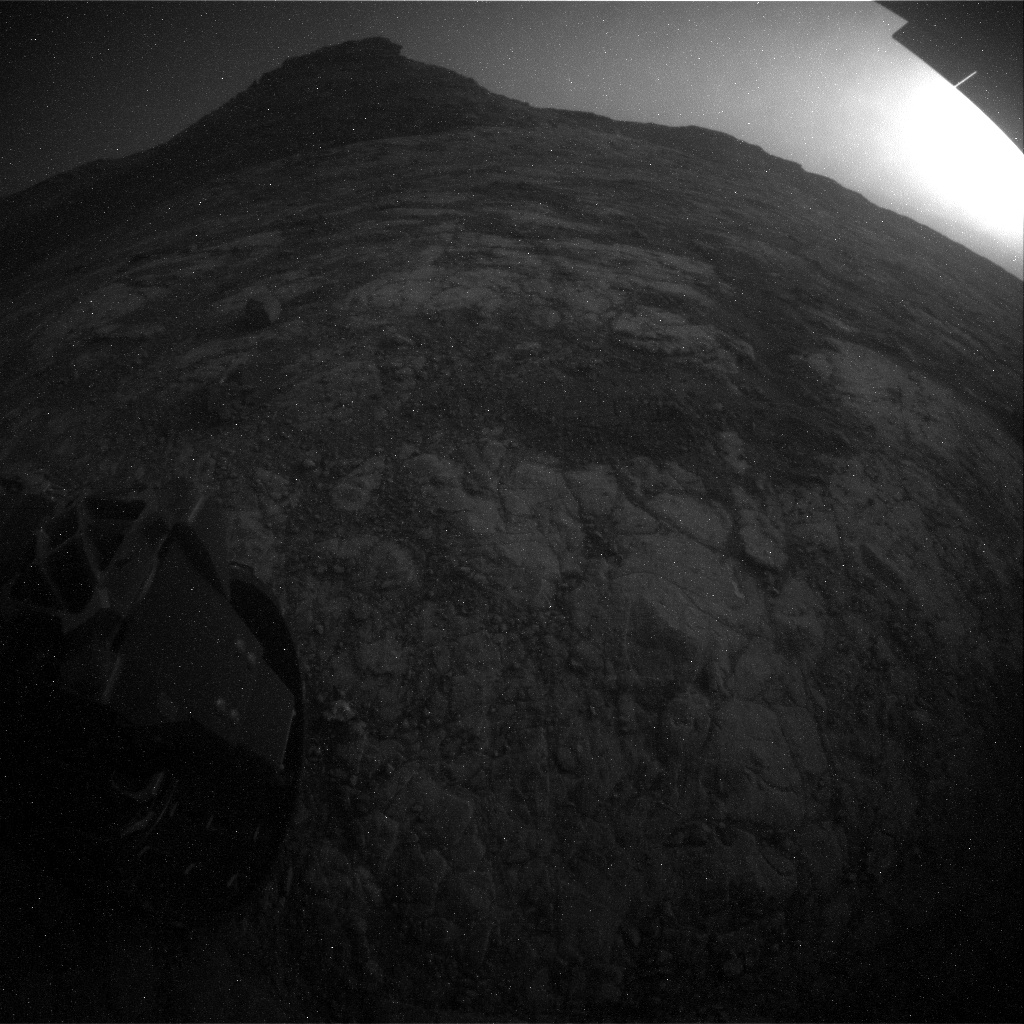

 Выберите действие:
  1 - фото космоса 
  2 - фото марсохода 
  3 - ближайшие астероиды 
  4 - погода 
  5 - выход
3
Введите дату в формате (ГГГГ-ММ-ДД): 2020-10-10
Средний диаметр в метрах - 308.7042559032
    Потенциальная угроза False
            
Средний диаметр в метрах - 22.57057467285
    Потенциальная угроза False
            
Средний диаметр в метрах - 55.149631747499996
    Потенциальная угроза False
            
Средний диаметр в метрах - 14.24106985895
    Потенциальная угроза False
            
Средний диаметр в метрах - 124.03453329185
    Потенциальная угроза False
            
Средний диаметр в метрах - 98.5241318746
    Потенциальная угроза False
            
Средний диаметр в метрах - 81.1974923264
    Потенциальная угроза False
            
Средний диаметр в метрах - 149.1223080412
    Потенциальная угроза False
            
Средний диаметр в метрах - 19.65814874445
    Потенциальная угроза False
            
Средний диаметр в метрах - 12.4034533292
    Потенциальная

In [ ]:
from ctypes import resize
import requests
from PIL import Image
from IPython.display import display
import io


def watch_apod():
  url_APOD = 'https://api.nasa.gov/planetary/apod/'
  params_APOD={
      "date" : input('Введите дату в формате (ГГГГ-ММ-ДД): '),
      "api_key" : 'xHbXVQDWEBOXqd3X8Va2F6JNhTdJN3yLq0i8piEU',
  }

  response =  requests.get(url_APOD,params_APOD)
  if response.status_code==200 :
    image_url = response.json()["hdurl"]
    res = requests.get(image_url)
    print(f'''  date - {response.json()['date']}
    explanation - {response.json()['explanation']}
          ''')
    img = Image.open(io.BytesIO(res.content))
    display(img)
  else:
    print("Ошибка в данных")

def watch_rover():
  url_rover="https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
  params_rover={
      "earth_date" : input('Введите дату в формате (ГГГГ-ММ-ДД): '),
      "camera" : input(f'''Выберите тип камеры: FHAZ, RHAZ, MAST, CHEMCAN, MAHLI, MARDI, NAVCAM, PANCAM, MINITES
      ''').upper(),
      "api_key" : 'xHbXVQDWEBOXqd3X8Va2F6JNhTdJN3yLq0i8piEU',
  }

  response =  requests.get(url_rover,params_rover)
  if response.status_code==200 and len(response.json()['photos'])!=0:
    image_url = response.json()['photos'][0]["img_src"]
    res = requests.get(image_url)
    img = Image.open(io.BytesIO(res.content))
    display(img)
  else:
    print("Ошибка в данных")

def watch_asteroids():
  url_asteroids='https://api.nasa.gov/neo/rest/v1/feed'
  date=input('Введите дату в формате (ГГГГ-ММ-ДД): ')
  params_asteroids={
      'start_date': date,
      'end_date': date,
      "api_key" : 'xHbXVQDWEBOXqd3X8Va2F6JNhTdJN3yLq0i8piEU',
  }

  response=requests.get(url_asteroids,params_asteroids)
  if response.status_code==200:
    data=response.json()

    for i in range(data["element_count"]):
      print(f'''Средний диаметр в метрах - {(data['near_earth_objects'][date][i]["estimated_diameter"]["meters"]["estimated_diameter_min"]+
                data['near_earth_objects'][date][i]["estimated_diameter"]["meters"]["estimated_diameter_max"])/2}
    Потенциальная угроза {data['near_earth_objects'][date][i]["is_potentially_hazardous_asteroid"]}
            ''')
  else:
    print("Ошибка в данных")

def watch_weather():
  url_weather='https://api.nasa.gov/DONKI/CME'
  params_weather={
      "api_key" : 'xHbXVQDWEBOXqd3X8Va2F6JNhTdJN3yLq0i8piEU',
  }
  response=requests.get(url_weather,params_weather)
  if response.status_code==200:
    data=response.json()
    print(f'''Выброс корональной массы:
    {data[0]['note']}
          широта - {data[0]["cmeAnalyses"][0]["latitude"]}
          долгота - {data[0]["cmeAnalyses"][0]["longitude"]}
          скорость - {data[0]["cmeAnalyses"][0]['speed']}
          тип - {data[0]["cmeAnalyses"][0]['type']}
          ''')

  url_weather='https://api.nasa.gov/DONKI/FLR'
  params_weather={
      "api_key" : 'xHbXVQDWEBOXqd3X8Va2F6JNhTdJN3yLq0i8piEU',
  }
  response=requests.get(url_weather,params_weather)
  if response.status_code==200:
    data=response.json()
    print(f'''Вспышка на солнце:
    {data[0]['note']}
          тип - {data[0]['classType']}
          ''')


while True :
  print(''' Выберите действие:
  1 - фото космоса
  2 - фото марсохода
  3 - ближайшие астероиды
  4 - погода
  5 - выход''')
  action = input()

  if action == '1':
    watch_apod()
  elif action == '2':
    watch_rover()
  elif action == '3':
    watch_asteroids()
  elif action == '4':
    watch_weather()
  elif action == '5':
    break

# Задание 2

Описание задачи

Цель этой задачи - создать скрипт на Python, который взаимодействует с API Чикагского института искусств (https://api.artic.edu/docs/) для извлечения и отображения произведений искусства. Скрипт должен позволять пользователям просматривать работы по страницам, фильтровать их по имени художника и просматривать подробную информацию о выбранных произведениях искусства. Ниже приведены требования и функциональные возможности, которые необходимо реализовать:

Требования:
Извлекать произведения искусства:

- Создайте функцию, которая извлекает список произведений искусства из API Чикагского института искусств.
Функция должна принимать параметр page для разбивки на страницы и возвращать список произведений искусства вместе с информацией о разбивке на страницы.
Фильтровать произведения искусства:

- Реализуйте функцию, которая фильтрует список произведений искусства на основе имени указанного художника. Функция должна возвращать список работ, которые соответствуют имени художника (без учета регистра).
Отображать подробную информацию об оформлении:

- Напишите функцию, которая отображает названия работ для пользователя и позволяет ему выбрать одну из них, введя соответствующий номер.
После выбора функция должна отображать подробную информацию о выбранном произведении, включая название, исполнителя, дату и носитель.
Разбивка на страницы и взаимодействие с пользователем:

- Создайте основную функцию, которая управляет выборкой произведений и взаимодействием с пользователем.

Разрешите пользователям перемещаться по страницам с произведениями искусства, выполнять фильтрацию по исполнителю или выходить из программы.

Если страниц с произведениями искусства несколько, укажите варианты перехода к следующей странице, предыдущей странице, фильтрации по исполнителю или выхода из программы.

In [ ]:
import requests
from google.colab import output
                                            # нужно тестировать ручками а зделал удаление старой записи там слишком много выходило

def get_artworks(page=1,limit=20):
  url = f"https://api.artic.edu/api/v1/artworks"
  params={
      'limit' : limit,
      'page' : page,
  }
  response = requests.get(url,params)
  return response.json()['data']

def watch_artworks(temp):
  print(f'Страница - {current_page}')
  artworks = [j['title'] for j in data]
  for i in range(len(artworks)):
    print(f'{i+1} - {(artworks[i])}  ')

def watch_artwork(temp):
  output.clear()
  print(f'''
  Название: {temp['title']}
  Исполнитель: {temp['artist_title']}
  Дата: {temp['date_display']}''')

def filter_by_artist(artist_name):
  data = get_artworks(1,limit=100)
  filtered_artworks = []
  for i in range(len(data)):
    if data[i]['artist_title']:
      filtered_artworks.append(data[i])
  return filtered_artworks


current_page=1
data=get_artworks(current_page)
watch_artworks(data)
while True:
  print(f'''
  Выберите действие:
  1 - Следйшая стрница
  2 - Прведушая страница
  3 - Подробная информация
  4 - Посик по исполнителю
  5 - Выход''')
  action=input('  Введите номер варианта: ')

  if action == '1':
    output.clear()
    current_page += 1
    data=get_artworks(current_page)
    watch_artworks(data)

  elif action == '2' and current_page > 1:
    current_page -=1
    output.clear()
    data=get_artworks(current_page)
    watch_artworks(data)

  elif action == '2' and current_page == 1:
    output.clear()
    print('Вы уже на первой странице')

  elif action == '3':
    watch_artwork(data[int(input('Выберите номер произведение: '))-1])
    while True:
      action=input('''
    1 - Вернуться назад
    2 - Посмотреть другое произведение
      Введите номер варианта: ''')
      if action == '1':
          watch_artworks(data)
          break
      elif action == '2':
        output.clear()
        watch_artwork(data[int(input('Выберите номер произведение: '))-1])

  elif action == '4':
    output.clear()
    data=(filter_by_artist(input('Введите имя исполнителя: '))) # я не смог отфильтрованое разбить на страницы но можно про каждого тут посмотреть через 3 - подробная информация
    watch_artworks(data)

  elif action == '5':
    break



Введите имя исполнителя: Artist unknown
Страница - 2
1 - Peacock Weather Vane  
2 - Funerary Papyrus of Tayu-henut-Mut  
3 - The Crucifixion  
4 - Two Putti  
5 - Fragment from Christ Carrying the Cross: Saint John the Evangelist  
6 - Elements I  
7 - Linear  
8 - 3-D Squares  
9 - The Tables Have Turned  
10 - Panel (Upholstery Fabric)  
11 - Girafters (Furnishing Fabric)  
12 - Kyoto Evergreen (Furnishing Fabric)  
13 - Untitled, plate ten from See America First  
14 - Rumble, from Brawling Spitfire Wrestling Series  
15 - Rose Bowl  
16 - Untitled (Butterfly Habitat)  
17 - Statue of Young Dionysos  
18 - Horse and Rider  
19 - Coffer  
20 - Still Life with Ostrich Egg Cup and the Whitfield Heirlooms  
21 - King Vulture  
22 - Console Table  
23 - Tureen and Stand  
24 - Chair  
25 - Circular Plaque  
26 - Sideboard and Wine Cabinet  
27 - Centerpiece: The Scarf Dance (Surtout: Le jeu de l'écharpe)  
28 - Chest for Photographs  
29 - Helmet Mask (Mukenga)  
30 - Two-Handled Cup and

# Задание 3

Задача: Создать программу по управлению портфелем криптовалют

Цель: Создать скрипт на Python, который извлекает цены на криптовалюты в режиме реального времени, позволяет пользователям управлять портфелем криптовалют, вычисляет общую стоимость портфеля, отслеживает изменения цен и предоставляет исторические данные о ценах для анализа.

Требования:
Получение текущих цен на криптовалюты:

Используйте https://docs.coingecko.com/ для получения актуальных цен на список криптовалют.

Управление портфелем:

- Позволяет пользователю создавать портфель криптовалют и управлять им, указывая количество каждой криптовалюты, которой он владеет.
- Расчитывает общую стоимость портфеля в указанной фиатной валюте (например, долларах США).

Отслеживание изменения цен:

- Отображение процентного изменения цены для каждой криптовалюты в портфеле за последние 24 часа.
- Выделите все криптовалюты, стоимость которых значительно увеличилась или снизилась.

Поиск исторических данных о ценах:

- Получение исторических данных о ценах на указанную криптовалюту за последнюю неделю.
- Предоставьте пользователю возможность визуализировать эти данные в простом текстовом формате (например, цены за день).

Взаимодействие с пользователем:

- Реализуйте интерфейс командной строки для ввода данных пользователем.
- Предоставьте опции для получения текущих цен, управления портфелем, просмотра изменений цен или анализа исторических данных.



Меню:
1. Получить текущие цены
2. Создать портфель
3. Рассчитать стоимость портфеля
4. Отслеживать изменения цен
5. Анализ исторических данных
6. Выход
Выберите пункт меню: 1
Введите название криптовалюты: ethereum
Текущая цена ethereum: 2444.11 USD

Меню:
1. Получить текущие цены
2. Создать портфель
3. Рассчитать стоимость портфеля
4. Отслеживать изменения цен
5. Анализ исторических данных
6. Выход
Выберите пункт меню: 2
Введите название криптовалюты (или 'q' для выхода): ethereum
Введите количество: 10
Введите название криптовалюты (или 'q' для выхода): bitcoin
Введите количество: 2
Введите название криптовалюты (или 'q' для выхода): q
Портфель успешно создан!

Меню:
1. Получить текущие цены
2. Создать портфель
3. Рассчитать стоимость портфеля
4. Отслеживать изменения цен
5. Анализ исторических данных
6. Выход
Выберите пункт меню: 3
Введите фиатную валюту (usd, eur, rub): usd
Общая стоимость портфеля: 162255.1 usd

Меню:
1. Получить текущие цены
2. Создать портфель
3. Рассчитать сто

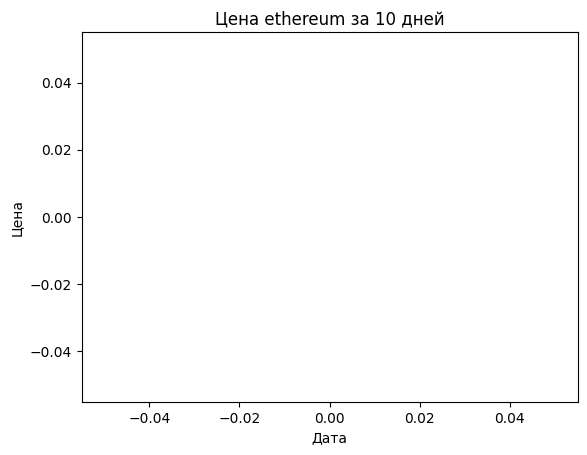


Меню:
1. Получить текущие цены
2. Создать портфель
3. Рассчитать стоимость портфеля
4. Отслеживать изменения цен
5. Анализ исторических данных
6. Выход
Выберите пункт меню: 6


In [ ]:
import requests
import datetime
import matplotlib.pyplot as plt


BASE_URL = "https://api.coingecko.com/api/v3"


def get_current_price(currency):
  url = f"https://api.coingecko.com/api/v3/simple/price?ids={currency}&vs_currencies=usd"
  response = requests.get(url)
  if response.status_code == 200:
      data = response.json()
      return data[currency]["usd"]
  else:
      print(f"Ошибка при получении цены {currency}")
      return None

def get_historical_data(currency, days):
  end_date = datetime.datetime.now()
  start_date = end_date - datetime.timedelta(days=days)
  url = f"https://api.coingecko.com/api/v3/coins/{currency}/history?date={start_date.strftime('%Y-%m-%d')}&localization=false"
  response = requests.get(url)
  if response.status_code == 200:
      data = response.json()
      return data["market_data"]["current_price"]["usd"]
  else:
      print(f"Ошибка при получении исторических данных {currency}")
      return None

def create_portfolio():
  portfolio = {}
  while True:
      currency = input("Введите название криптовалюты (или 'q' для выхода): ").lower()
      if currency == "q":
          break
      if currency in SUPPORTED_CURRENCIES:
          amount = float(input("Введите количество: "))
          portfolio[currency] = amount
      else:
          print("Неподдерживаемая криптовалюта")
  return portfolio

def calculate_portfolio_value(portfolio, fiat_currency="usd"):
  total_value = 0
  for currency, amount in portfolio.items():
      price = get_current_price(currency)
      if price:
          total_value += amount * price
  return total_value

def track_price_changes(portfolio):
  for currency in portfolio:
      current_price = get_current_price(currency)
      if current_price:
          yesterday_price = get_historical_data(currency, days=1)
          if yesterday_price:
              price_change = ((current_price - yesterday_price) / yesterday_price) * 100
              print(f"{currency}: {price_change:.2f}%")
          else:
              print(f"Ошибка при получении исторических данных {currency}")
      else:
          print(f"Ошибка при получении цены {currency}")

def visualize_historical_data(currency, days):
  prices = []
  dates = []
  for day in range(days):
      price = get_historical_data(currency, days=day + 1)
      if price:
          dates.append(datetime.datetime.now() - datetime.timedelta(days=day))
          prices.append(price)
  plt.plot(dates, prices)
  plt.xlabel("Дата")
  plt.ylabel("Цена")
  plt.title(f"Цена {currency} за {days} дней")
  plt.show()

while True:
    print("\nМеню:")
    print("1. Получить текущие цены")
    print("2. Создать портфель")
    print("3. Рассчитать стоимость портфеля")
    print("4. Отслеживать изменения цен")
    print("5. Анализ исторических данных")
    print("6. Выход")

    choice = input("Выберите пункт меню: ")

    if choice == "1":
        currency = input("Введите название криптовалюты: ").lower()
        if currency in SUPPORTED_CURRENCIES:
            price = get_current_price(currency)
            if price:
                print(f"Текущая цена {currency}: {price:.2f} USD")
            else:
                print(f"Ошибка при получении цены {currency}")
        else:
            print("Неподдерживаемая криптовалюта")

    elif choice == "2":
        portfolio = create_portfolio()
        print("Портфель успешно создан!")

    elif choice == "3":
        if "portfolio" in locals():
            fiat_currency = input("Введите фиатную валюту (usd, eur, rub): ").lower()
            if fiat_currency in SUPPORTED_FIAT:
                total_value = calculate_portfolio_value(portfolio, fiat_currency)
                print(f"Общая стоимость портфеля: {total_value:} {fiat_currency}")
            else:
                print("Неподдерживаемая фиатная валюта")
        else:
            print("Портфель не создан")

    elif choice == "4":
        if "portfolio" in locals():
            track_price_changes(portfolio)
        else:
            print("Портфель не создан")

    elif choice == "5":
        currency = input("Введите название криптовалюты: ").lower()
        if currency in SUPPORTED_CURRENCIES:
            days = int(input("Введите количество дней для анализа: "))
            visualize_historical_data(currency, days)
        else:
            print("Неподдерживаемая криптовалюта")

    elif choice == "6":
        break

    else:
        print("Неверный выбор")